In [1]:
# Analysis created by Haoyu Chen
# Jun 2020

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import random

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [30]:
random.seed(30)
# Make sure results are replicable

In [5]:
df = pd.read_csv('creditcard.csv')

In [6]:
# Identify missing values - Luckily there's none!
# The features are not in human-readable format 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [11]:
print(len(df[df.Class==1]))
print(round(len(df[df.Class==1])/len(df)*100, 2), '%')
# 422 fraud transations - largely imbalanced case

492
0.17 %


In [12]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
target = ['Class']
features = [i for i in df.columns if i not in target]

In [14]:
# Scale the data for machine learning models - mainly logistic regression
scaler = StandardScaler()
scaler.fit(df[features])
scaled_feature = pd.DataFrame(scaler.transform(df[features]))

In [15]:
# Prepare test sample from the original imbalance set: X_test, y_test
X_original_train, X_original_test, y_original_train, y_original_test= train_test_split(scaled_feature, df[target], test_size=0.2,
                                                   stratify=df[target], random_state = 42)

In [16]:
# Prepare the balanced training set
df_train = pd.concat([X_original_train, y_original_train],axis = 1)
df_train.columns = df.columns

In [17]:
df_sample = pd.concat([df_train[df_train.Class == 1], df_train[df_train.Class == 0]\
                       .sample(n = len(df_train[df_train.Class == 1]))])

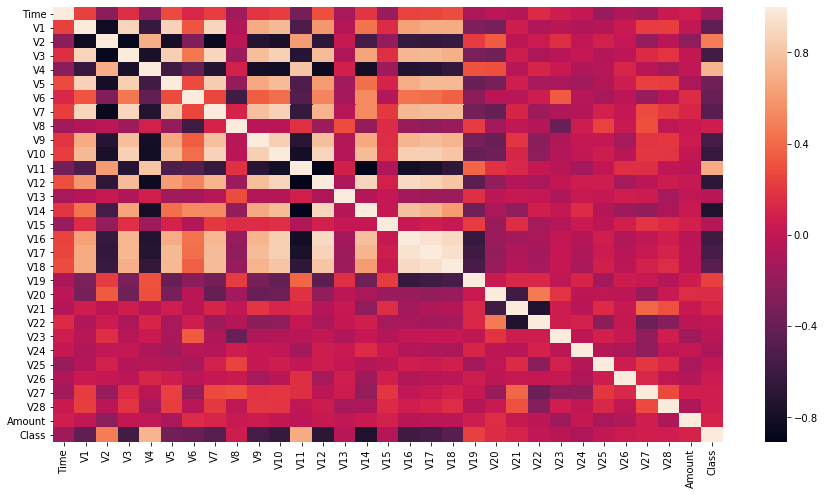

In [18]:
# Correlation heat map
f, a = plt.subplots(figsize = (15,8))
sns.heatmap(df_sample.corr())

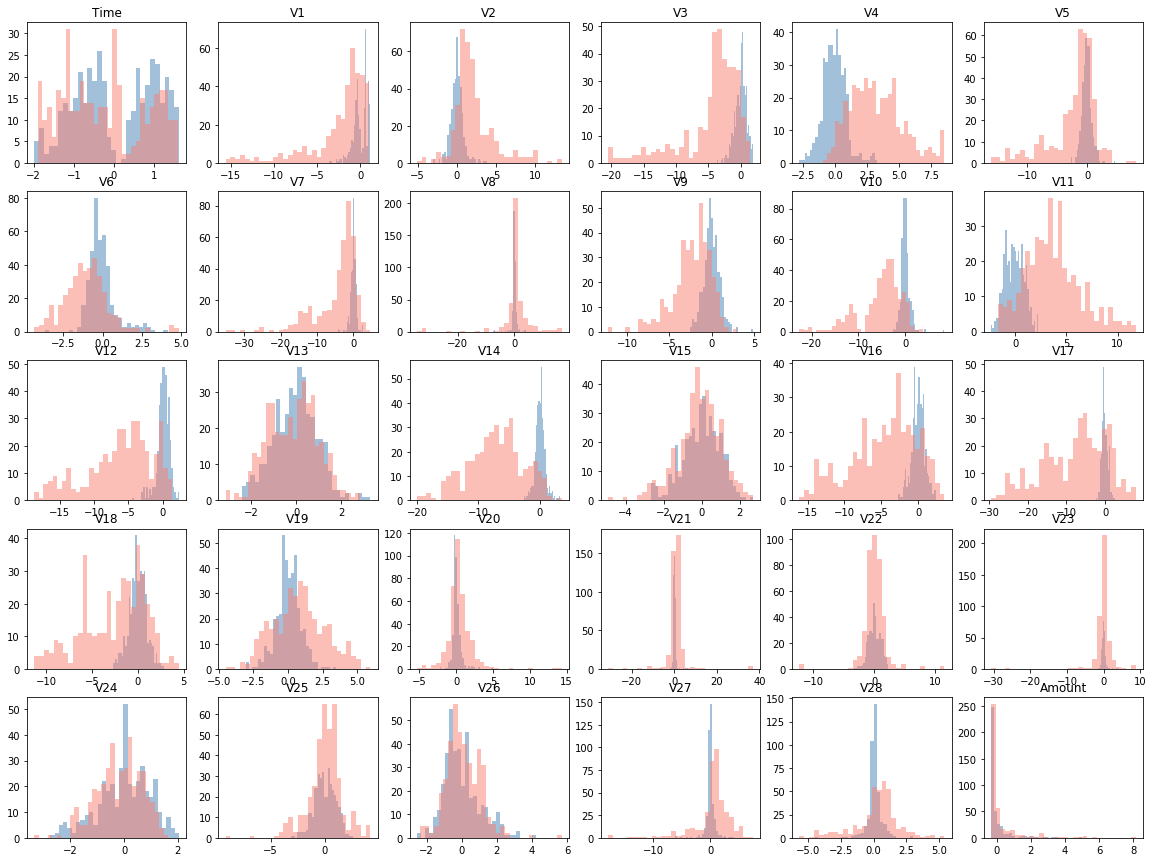

In [19]:
# Visualisation of all variables and sense check the difference between two class.

f, ax = plt.subplots(5,6, figsize=(20, 15))
l = []

for sublist in ax:
    for i in sublist:
        l.append(i)
a = zip(list(df_sample.columns), l)

for i, ax in list(a):
    if i != 'Class':
        df_sample[df_sample.Class == 0][i].plot(kind = 'hist', bins = 30, color = 'steelblue', alpha = 0.5, ax = ax)
        df_sample[df_sample.Class == 1][i].plot(kind = 'hist', bins = 30, color = 'salmon', alpha = 0.5,
                                    title = i, ax = ax)
        ax.set(xlabel='', ylabel='')

plt.show()

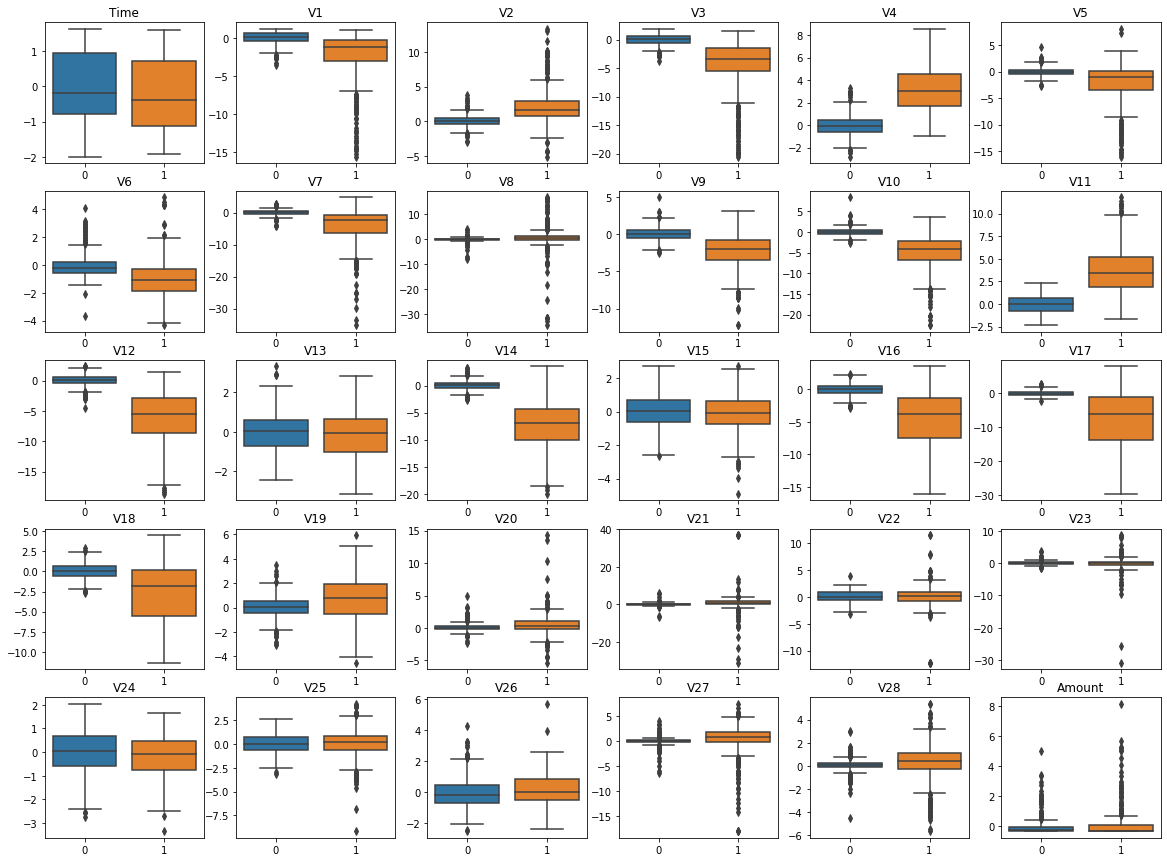

In [20]:
f, ax = plt.subplots(5,6, figsize=(20, 15))
l = []

for sublist in ax:
    for i in sublist:
        l.append(i)
a = zip(list(df_sample.columns), l)

for i, ax in list(a):
    if i != 'Class':
        sns.boxplot(x = 'Class', data = df_sample, y = i, ax = ax)
        ax.set(xlabel='', title = i, ylabel='')

plt.show()

# Data Prep

In [46]:
# Write the measurement function with accuracy score, confusion matrix and AUC score.
def measurement(y_test, y_pred, y_proba):
    print('Accuracy Score: ', accuracy_score(y_test, y_pred))
    print('AUC: ', roc_auc_score(y_test, y_proba))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = plt.cm.YlGn)
    plt.show()

In [22]:
# Prepare training set and testing set - balanced sample
X_train, X_test, y_train, y_test= train_test_split(df_sample[features], df_sample[target], test_size=0.2,
                                                   stratify=df_sample[target], random_state = 42)

# Test Different Models

## Decision Tree

In [31]:
dt = DecisionTreeClassifier()

In [32]:
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_original_test)
y_pred_proba_dt = dt.predict_proba(X_original_test)
fpr_dt, tpr_dt, _ = roc_curve(y_original_test, y_pred_proba_dt[:,1])

Accuracy Score:  0.9067975141322285
AUC:  0.9125724607513235


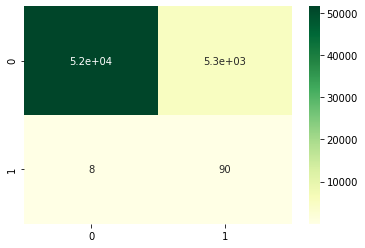

In [47]:
measurement(y_original_test, y_pred_dt, y_pred_proba_dt[:,1])

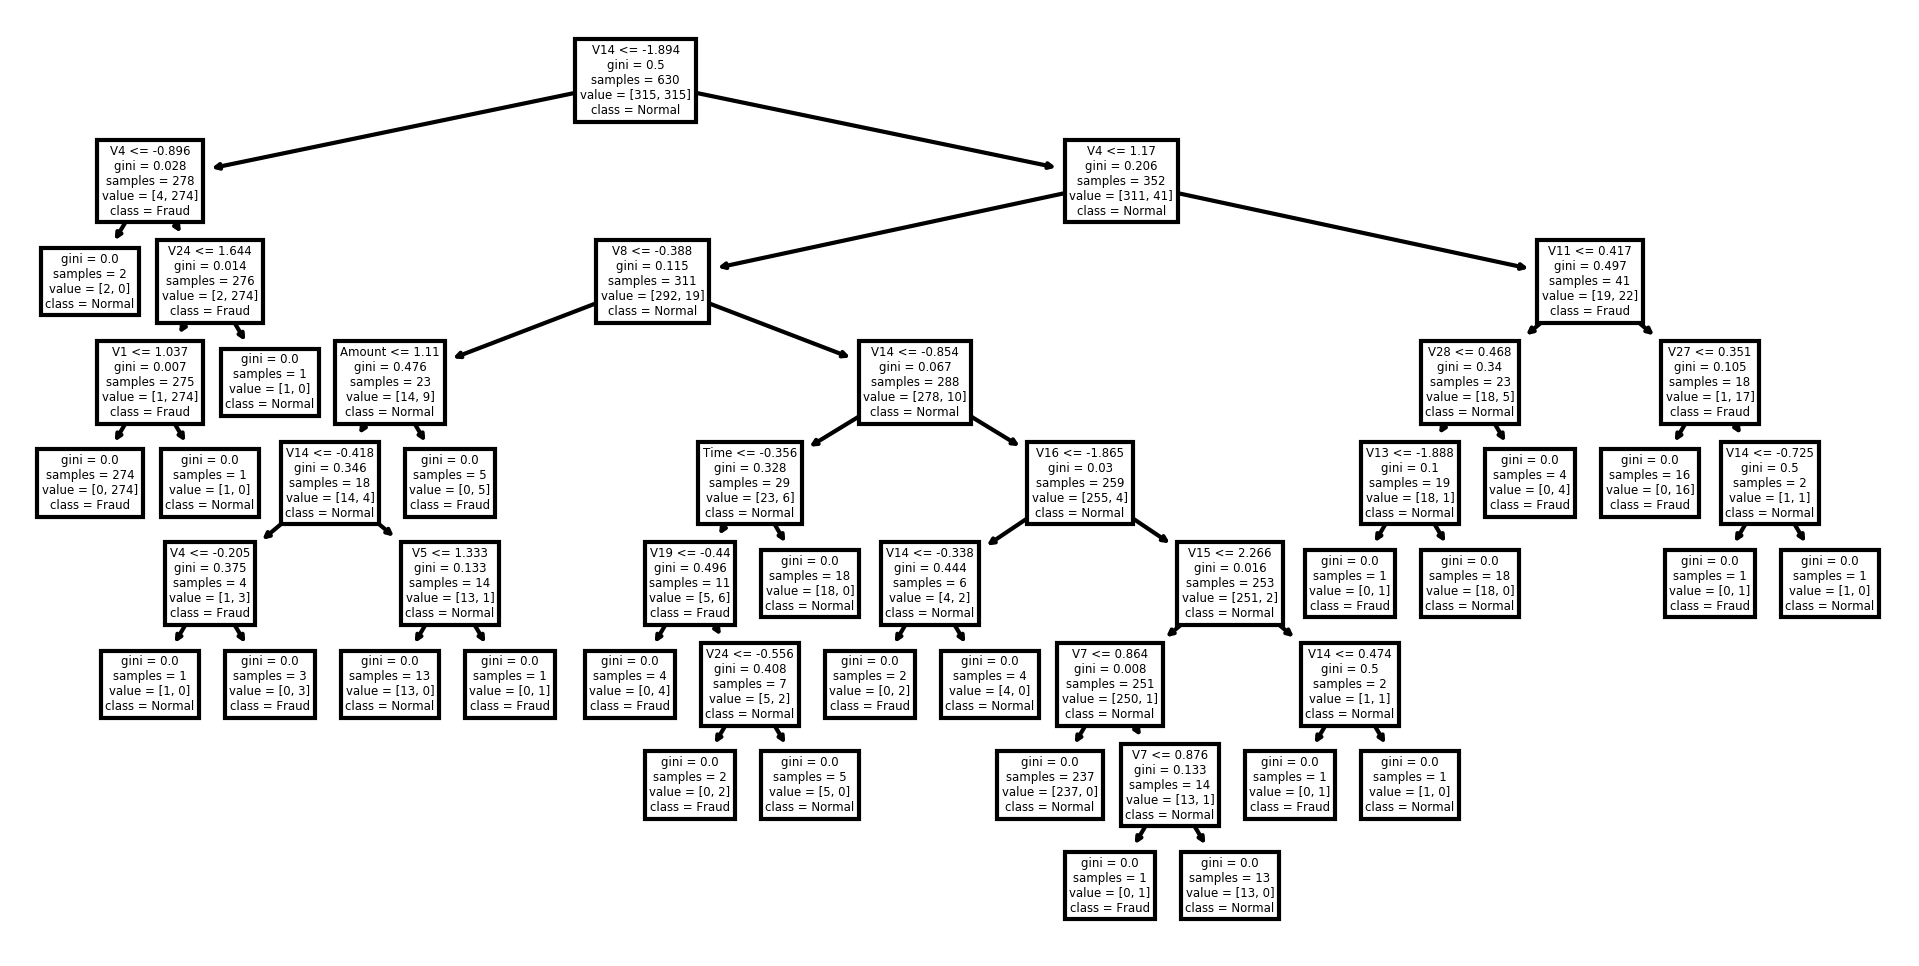

In [34]:
fig, ax = plt.subplots(figsize = (8,4), dpi = 300)
plot_tree(dt, class_names = ['Normal', 'Fraud'], 
          feature_names = df_sample[features].columns)
plt.show()

In [42]:
y_pred_proba_dt[:,1]

array([0., 0., 1., ..., 0., 0., 0.])

<BarContainer object of 30 artists>

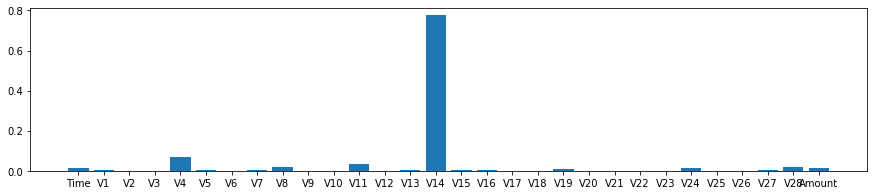

In [35]:
plt.figure(figsize = (15,3))
plt.bar(features, dt.feature_importances_)
# Feature Importance

## Logistic Regression

In [36]:
lr = LogisticRegression()

In [37]:
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_original_test)
y_pred_proba_lr = lr.predict_proba(X_original_test)
fpr_lr, tpr_lr, _ = roc_curve(y_original_test, y_pred_proba_lr[:,1])

<BarContainer object of 30 artists>

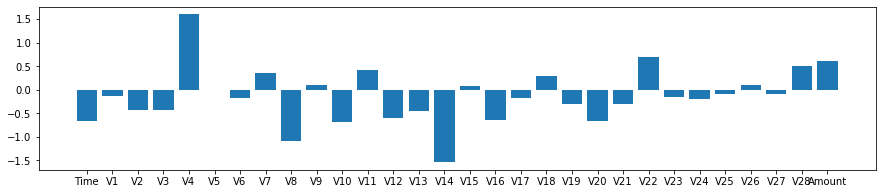

In [38]:
plt.figure(figsize = (15,3))
plt.bar(features, lr.coef_[0])
# Feature Importance

Accuracy Score:  0.9506162002738668
AUC:  0.974253015429582


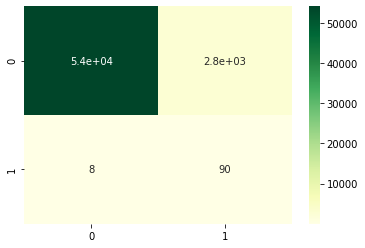

In [48]:
measurement(y_original_test, y_pred_lr, y_pred_proba_lr[:,1])

## Random Forest

In [50]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_original_test)
y_pred_proba_rf = rf.predict_proba(X_original_test)
fpr_rf, tpr_rf, _ = roc_curve(y_original_test, y_pred_proba_rf[:,1])

Accuracy Score:  0.9641866507496225
AUC:  0.9754814207618894


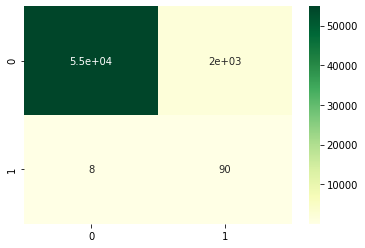

In [51]:
measurement(y_original_test, y_pred_rf, y_pred_proba_rf[:,1])

<BarContainer object of 30 artists>

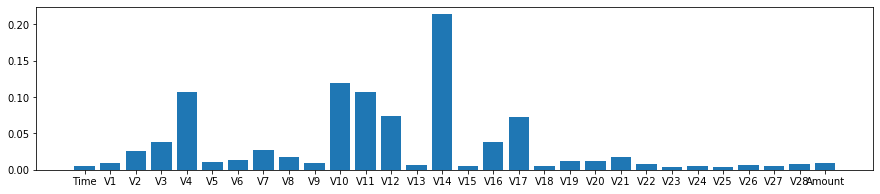

In [52]:
plt.figure(figsize = (15,3))
plt.bar(features, rf.feature_importances_)
# Feature Importance

## Gradient Boosting

In [53]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_original_test)
y_pred_proba_gb = gb.predict_proba(X_original_test)
fpr_gb, tpr_gb, _ = roc_curve(y_original_test, y_pred_proba_gb[:,1])

Accuracy Score:  0.9493521997120887
AUC:  0.9819836875380428


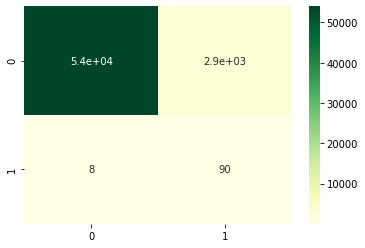

In [54]:
measurement(y_original_test, y_pred_gb, y_pred_proba_gb[:,1])

<BarContainer object of 30 artists>

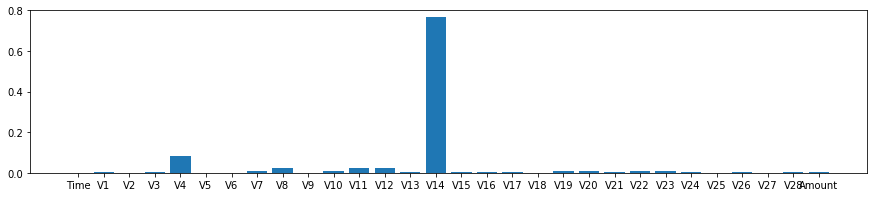

In [55]:
plt.figure(figsize = (15,3))
plt.bar(features, gb.feature_importances_)
# Feature Importance

## Voting

In [56]:
joint_proba = (y_pred_proba_lr+y_pred_proba_dt+y_pred_proba_rf+y_pred_proba_gb)/4

In [57]:
fpr_joined, tpr_joined, _ = roc_curve(y_original_test, joint_proba[:,1])
prediction = [round(i) for i in joint_proba[:,1]]

Accuracy Score:  0.951950423089077
AUC:  0.9787755317377373


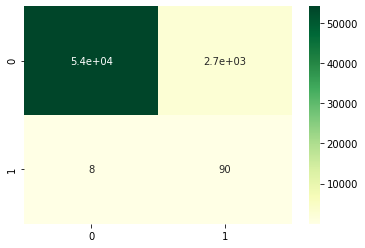

In [58]:
measurement(y_original_test, prediction, joint_proba[:,1])

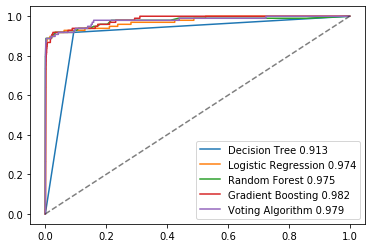

In [60]:
# Plot ROC AUC Curve for all algorithms used
plt.plot(fpr_dt, tpr_dt, label='Decision Tree %1.3f' %roc_auc_score(y_original_test, y_pred_proba_dt[:,1]))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression %1.3f' %roc_auc_score(y_original_test, y_pred_proba_lr[:,1]))
plt.plot(fpr_rf, tpr_rf, label='Random Forest %1.3f' %roc_auc_score(y_original_test, y_pred_proba_rf[:,1]))
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting %1.3f' %roc_auc_score(y_original_test, y_pred_proba_gb[:,1]))
plt.plot(fpr_joined, tpr_joined, label='Voting Algorithm %1.3f' %roc_auc_score(y_original_test, joint_proba[:,1]))
plt.plot([0, 1], [0, 1], 'k--', alpha = 0.5)
plt.legend()
plt.show()

# Hyperparameter Tuning - Gradient Boosting

In [61]:
param_grid = {'n_estimators':[100, 150, 200], 
              'subsample': [0.8, 1], 
              'learning_rate':[0.05, 0.1, 0.2], 
              'max_depth':[3, 5, 7]}

In [62]:
gb = GradientBoostingClassifier()
gb_cv = GridSearchCV(gb, param_grid, cv = 5)
gb_cv.fit(X_train, y_train)
gb_cv.best_params_

{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}

In [63]:
gb_cv.best_score_

0.946031746031746

Accuracy Score:  0.957603314490362
AUC:  0.9807713427239213


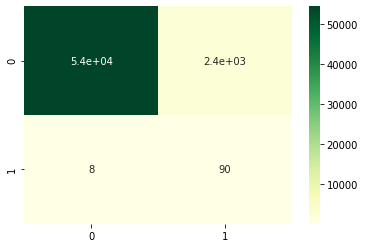

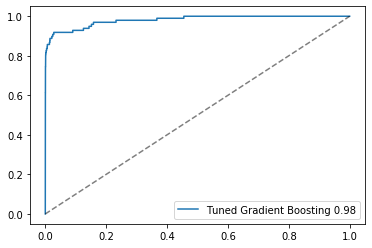

In [66]:
gb_tuned = GradientBoostingClassifier(learning_rate=0.05, max_depth = 5, n_estimators = 200, subsample = 0.8)
gb_tuned.fit(X_train, y_train)

# Applied on imbalanced testing set
y_pred_tuned = gb_tuned.predict(X_original_test)
y_pred_proba_tuned = gb_tuned.predict_proba(X_original_test)
measurement(y_original_test, y_pred_tuned, y_pred_proba_tuned[:,1])

fpr_tuned, tpr_tuned, _ = roc_curve(y_original_test, y_pred_proba_tuned[:,1])
plt.plot(fpr_tuned, tpr_tuned, label='Tuned Gradient Boosting %1.2f' %roc_auc_score(y_original_test, y_pred_proba_tuned[:,1]))
plt.plot([0, 1], [0, 1], 'k--', alpha = 0.5)
plt.legend()
plt.show()

In [67]:
# Seems like there's no significant increase in AUC score

# Decile - Model performance based on concentration

## Gradient Boosting Concentration

In [111]:
sum(plotting['Fraud'])

98

In [117]:
decile = pd.qcut(y_pred_proba_tuned[:,1], 1000, labels = False, duplicates='drop')
result = pd.DataFrame([y_pred_proba_tuned[:,1], decile]).transpose()
result.columns = ['Proba', 'Decile']
result_decile = pd.concat([y_original_test.reset_index(drop=True), result], axis = 1)

In [118]:
plotting = result_decile.groupby('Decile').agg({'Class':'sum', 'Proba':'count'}).reset_index()
plotting.columns = ['Decile', 'Fraud', '# in Decile']
plotting['Percentage Fraud'] = plotting['Fraud']/plotting['# in Decile']
plotting['Percentage of Fraud'] = plotting['Fraud']/sum(plotting['Fraud'])

plotting.tail(10)
# Good concentration in the last 2 'deciles'
# Capturing 73 out of 98 frauds and 41 false positives
# Longer tails

,Decile,Fraud,# in Decile,Percentage Fraud,Percentage of Fraud
973,973.0,0,56,0.000000,0.000000
974,974.0,1,57,0.017544,0.010204
975,975.0,1,57,0.017544,0.010204
976,976.0,0,57,0.000000,0.000000
977,977.0,1,57,0.017544,0.010204
978,978.0,1,57,0.017544,0.010204
979,979.0,1,57,0.017544,0.010204
980,980.0,6,57,0.105263,0.061224
981,981.0,32,57,0.561404,0.326531
982,982.0,41,57,0.719298,0.418367


## Voting Algorithm Concentration

In [114]:
decile = pd.qcut(joint_proba[:,1], 1000, labels = False, duplicates='drop')
result = pd.DataFrame([joint_proba[:,1], decile]).transpose()
result.columns = ['Proba', 'Decile']
result_decile = pd.concat([y_original_test.reset_index(drop=True), result], axis = 1)

In [116]:
plotting = result_decile.groupby('Decile').agg({'Class':'sum', 'Proba':'count'}).reset_index()
plotting.columns = ['Decile', 'Fraud', '# in Decile']
plotting['Percentage Fraud'] = plotting['Fraud']/plotting['# in Decile']
plotting['Percentage of Fraud'] = plotting['Fraud']/sum(plotting['Fraud'])

plotting.tail(10)
# Good concentration in the last 2 'deciles'
# Capturing 78 out of 98 frauds and 36 false positives
# Better concentration despite lower AUC score - would be recommended in real situations

,Decile,Fraud,# in Decile,Percentage Fraud,Percentage of Fraud
990,990.0,0,57,0.000000,0.000000
991,991.0,0,57,0.000000,0.000000
992,992.0,0,57,0.000000,0.000000
993,993.0,0,57,0.000000,0.000000
994,994.0,0,57,0.000000,0.000000
995,995.0,2,57,0.035088,0.020408
996,996.0,0,57,0.000000,0.000000
997,997.0,7,57,0.122807,0.071429
998,998.0,32,57,0.561404,0.326531
999,999.0,46,57,0.807018,0.469388
